# Movie Data Analysis

- Student name: Gamze Turan
- Student pace: self paced 
- Scheduled project review date/time: 4/27/2022
- Instructor name: Claude Fried 
- Blog post URL:https://ginaturan.blogspot.com/

<img align="center" width="800" height="600" src='images/action.jpg'>

## Overview

>This project analysis is determining profitability of a film studio is crucially dependent on picking the right film projects. In order to find the best film project we will find the most popular genres according to our datasets and their profits. Also, another aspect of film projects is their ratings. Depending on the case, rating can lower the sales of the movie or totally cross out the movie from existence (Scoot Bowles).

## Business Problem

<img align="center" width="800" height="600" src='images/microsoft_studio.jpg'>

> Microsoft sees all the big companies creating original video content and they want to get in on the fun.Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

<img align="left" width="600" height="600" src='images/hollywood.jpg'>

The movie business has a large scale of data since they have been an existence for over a century. From selected data files, we will combine them to determine genres, ratings and profitability.

In [547]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import operator

In [548]:
df_bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_rating = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [549]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [550]:
df_imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [551]:
df_imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Bom Movie Data
> The Bom Movie dataset includes from 2010 to 2018 and includes the movie title,domestic and foriegn gross income.

In [552]:
df_bom_gross.sample(5)

,title,studio,domestic_gross,foreign_gross,year
2748,The Carer,Crnth,6200.0,NaN,2016
2457,Race (2016),Focus,19200000.0,5900000,2016
2036,Shanghai,Wein.,46400.0,9200000,2015
791,The Campaign,WB,86900000.0,18000000,2012
1699,Living is Easy with Eyes Closed,Outs,11600.0,2600000,2014


In [553]:
# to check if there are any duplication
df_bom_gross.duplicated().value_counts()

False    3387
dtype: int64

In [554]:
# NaN values in the datasets
df_bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

# Imdb Data
> The Imdb basics and ratings dataset includes from 2010 to 2018 and and includes movie titles, genres, avarage rating and number of votes.

In [555]:
df_imdb_basics.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
15933,tt1753543,Bright Day!,Bright Day!,2010,86.0,"Adventure,Comedy,Documentary"
15576,tt1740710,Mere Brother Ki Dulhan,Mere Brother Ki Dulhan,2011,139.0,"Comedy,Family,Romance"
71020,tt4061558,Yoddha The Warrior,Yoddha The Warrior,2014,151.0,"Action,Drama,Fantasy"
59323,tt3450326,A Culture of Silence,A Culture of Silence,2014,84.0,"Biography,Documentary,Drama"
100247,tt5860564,Dhilluku Dhuddu,Dhilluku Dhuddu,2016,160.0,"Comedy,Horror"


In [556]:
df_imdb_basics.duplicated().value_counts()

False    146144
dtype: int64

In [557]:
df_imdb_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [558]:
df_imdb_rating.sample(5)

,tconst,averagerating,numvotes
73597,tt7291412,8.2,52
1889,tt6922786,5.1,146
21106,tt7821038,6.1,25
54306,tt4716680,7.2,19
51086,tt6386998,8.7,7


In [559]:
df_imdb_rating.duplicated().value_counts()

False    73856
dtype: int64

In [560]:
df_imdb_rating.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

# Merge Data
> While the dataset understandable amount I merged all dataframe on colums to determine necessary information as well as cleaning the data to final analysis.

In [561]:
# merge basics in rating based on tconst
df_merge = pd.merge(df_imdb_basics,df_imdb_rating, on="tconst")
df_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [562]:
# drop the dublicated info column
df_merge = df_merge.drop(['tconst', 'runtime_minutes'], axis=1)
df_merge                 

,primary_title,original_title,start_year,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [563]:
# creating a new column called title and its contain the same values from the original title
df_merge['title'] = df_merge['original_title']

In [564]:
# 2nd merge bom_gross and df_merge based on title
df_merge = pd.merge(df_bom_gross, df_merge, on="title", how='inner')
df_merge

,title,studio,domestic_gross,foreign_gross,year,primary_title,original_title,start_year,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...
2442,Loving Pablo,Uni.,22000.0,NaN,2018,Loving Pablo,Loving Pablo,2017,"Action,Biography,Crime",6.3,13988
2443,The Escape,IFC,14000.0,NaN,2018,The Escape,The Escape,2017,Drama,5.9,1290
2444,Souvenir,Strand,11400.0,NaN,2018,Souvenir,Souvenir,2016,"Drama,Music,Romance",6.0,823
2445,Souvenir,Strand,11400.0,NaN,2018,Souvenir,Souvenir,2014,"Comedy,Romance",5.9,9


In [565]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2447 non-null   object 
 1   studio          2444 non-null   object 
 2   domestic_gross  2429 non-null   float64
 3   foreign_gross   1573 non-null   object 
 4   year            2447 non-null   int64  
 5   primary_title   2447 non-null   object 
 6   original_title  2447 non-null   object 
 7   start_year      2447 non-null   int64  
 8   genres          2443 non-null   object 
 9   averagerating   2447 non-null   float64
 10  numvotes        2447 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 229.4+ KB


# Data Cleaning
> In the merged file, I make them easier to work with by replacing NaN values with median, dropping unnecessary columns and creaiton function to change data types.

In [566]:
# drop  column
df_merge = df_merge.drop(['studio', 'original_title', 'primary_title', 'year'], axis=1)
df_merge.sample(5)

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes
284,The Iron Lady,30000000.0,84900000,2011,"Biography,Drama",6.4,96066
787,Take Me Home,15800.0,NaN,2016,Horror,5.6,260
201,The Girl on the Train,208000.0,97100,2013,Thriller,4.4,819
1298,Decoding Annie Parker,48400.0,NaN,2013,Drama,6.3,2785
979,Ginger & Rosa,1000000.0,NaN,2012,Drama,6.3,9652


In [567]:
# replace the NaN values with median in row
df_merge['domestic_gross'].fillna(value=df_merge['domestic_gross'].median(), inplace=True)

In [568]:
## replace the NaN values with 0 in row
df_merge['foreign_gross'].fillna(value=0, inplace=True)

In [569]:
# creating a function to replace str to float and remove ","
def parsecomma(x):
    if type(x)== str:
        return float(x.replace(',',''))
    else:
        return 0

In [570]:
# used Transform function to transform values by passing each into parsecomma
df_merge['foreign_gross'] = df_merge['foreign_gross'].transform(parsecomma)

In [571]:
# turning NaN values into empty strings
df_merge.dropna(inplace=True, axis=0)

In [572]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2446
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2443 non-null   object 
 1   domestic_gross  2443 non-null   float64
 2   foreign_gross   2443 non-null   float64
 3   start_year      2443 non-null   int64  
 4   genres          2443 non-null   object 
 5   averagerating   2443 non-null   float64
 6   numvotes        2443 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 152.7+ KB


In [573]:
df_merge.describe()

,domestic_gross,foreign_gross,start_year,averagerating,numvotes
count,2.443000e+03,2.443000e+03,2443.000000,2443.000000,2.443000e+03
mean,3.587207e+07,5.242519e+07,2013.774458,6.405690,7.284939e+04
std,6.935400e+07,1.185574e+08,2.493786,1.045491,1.346654e+05
min,1.000000e+02,0.000000e+00,2010.000000,1.600000,5.000000e+00
25%,3.040000e+05,0.000000e+00,2012.000000,5.800000,3.791000e+03
50%,5.100000e+06,4.200000e+06,2014.000000,6.500000,2.083100e+04
75%,4.260000e+07,4.470000e+07,2016.000000,7.100000,8.086100e+04
max,7.001000e+08,9.464000e+08,2019.000000,9.200000,1.841066e+06


In [574]:
# sample of final data
df_merge.sample(5)

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes
1652,The Girl in the Book,8200.0,0.0,2015,Drama,6.2,3684
1371,The Big Short,70300000.0,63200000.0,2015,"Biography,Comedy,Drama",7.8,309227
2424,The Negotiation,111000.0,0.0,2018,"Action,Crime,Thriller",6.5,926
241,Rango,123500000.0,122200000.0,2011,"Adventure,Animation,Comedy",7.2,215761
1606,Eden,65500.0,0.0,2019,"Crime,Drama",8.0,11


# Feature Engineering
> I created a total_gross feature to combine domestic and foreign gross to indicate total profit.

In [575]:
df_merge['total_gross'] = df_merge['domestic_gross'] + df_merge['foreign_gross']
df_merge['total_gross']

0       1.067000e+09
1       8.283000e+08
2       7.526000e+08
3       6.985000e+08
4       6.239000e+08
            ...     
2442    2.200000e+04
2443    1.400000e+04
2444    1.140000e+04
2445    1.140000e+04
2446    1.700000e+03
Name: total_gross, Length: 2443, dtype: float64

In [576]:
df_merge.iloc[0]

title                            Toy Story 3
domestic_gross                      4.15e+08
foreign_gross                       6.52e+08
start_year                              2010
genres            Adventure,Animation,Comedy
averagerating                            8.3
numvotes                              682218
total_gross                        1.067e+09
Name: 0, dtype: object

> Look at the above cell to see multiple genres appear together in one string. The following cell deals with this.

In [577]:
df_genres = df_merge['genres'].str.get_dummies(sep=',')
df_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2445,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [578]:
df_merge.loc[1932]

title             Dancer
domestic_gross     71900
foreign_gross          0
start_year          2016
genres            Action
averagerating        8.6
numvotes              11
total_gross        71900
Name: 1932, dtype: object

In [579]:
df_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [580]:
df_genres['total_gross'] = df_merge['total_gross']

In [581]:
df_genres['averagerating'] = df_merge['averagerating']

In [582]:
genres_total = []
for genre in df_genres.columns:
    genres_total.append((genre, df_genres[df_genres[genre]==1]['total_gross'].mean()))

In [583]:
genres_rating = []
for genre in df_genres.columns:
    genres_rating.append((genre, df_genres[df_genres[genre]==1]['averagerating'].mean()))

In [584]:
genres_rating = pd.DataFrame(genres_rating, columns=['genres', 'averagerating']) 
genres_rating

,genres,averagerating
0,Action,6.205313
1,Adventure,6.457218
2,Animation,6.563717
3,Biography,6.982031
4,Comedy,6.223767
5,Crime,6.400909
6,Documentary,7.268447
7,Drama,6.528508
8,Family,6.167619
9,Fantasy,6.184444


In [585]:
genres_total = pd.DataFrame(genres_total, columns=["genres", "total_gross"]) 
genres_total

,genres,total_gross
0,Action,1.808460e+08
1,Adventure,2.939741e+08
2,Animation,3.276688e+08
3,Biography,4.836256e+07
4,Comedy,9.087477e+07
5,Crime,5.404217e+07
6,Documentary,3.034394e+07
7,Drama,4.554326e+07
8,Family,1.282370e+08
9,Fantasy,1.755981e+08


In [586]:
genres_rating.dropna(axis=0, inplace=True)

In [587]:
genres_rating = genres_rating.sort_values(by='averagerating', ascending=False)
genres_rating

,genres,averagerating
6,Documentary,7.268447
15,News,7.100000
3,Biography,6.982031
18,Sport,6.898148
10,History,6.866667
12,Music,6.722619
20,War,6.583333
2,Animation,6.563717
7,Drama,6.528508
21,Western,6.511111


In [588]:
genres_total.dropna(axis=0, inplace=True)

In [589]:
genres_total = genres_total.sort_values(by='total_gross', ascending=False)
genres_total

,genres,total_gross
2,Animation,3.276688e+08
1,Adventure,2.939741e+08
17,Sci-Fi,2.800972e+08
0,Action,1.808460e+08
9,Fantasy,1.755981e+08
8,Family,1.282370e+08
4,Comedy,9.087477e+07
13,Musical,8.610620e+07
19,Thriller,8.375846e+07
18,Sport,8.213779e+07


In [590]:
start_year = df_merge.sort_values(by='start_year', ascending=False)
start_year

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes,total_gross
154,The Runaways,3600000.0,1100000.0,2019,Adventure,9.2,47,4.700000e+06
1006,The Silence,100000.0,132000.0,2019,"Horror,Thriller",5.2,22399,2.320000e+05
1151,The Gambler,33700000.0,5600000.0,2019,"Action,Sci-Fi,Thriller",6.1,10,3.930000e+07
303,Abduction,28100000.0,54000000.0,2019,"Action,Sci-Fi",6.1,1592,8.210000e+07
2096,Born in China,13900000.0,11200000.0,2019,Documentary,7.5,103,2.510000e+07
...,...,...,...,...,...,...,...,...
212,Freakonomics,101000.0,16400.0,2010,Documentary,6.4,6466,1.174000e+05
213,Band Baaja Baaraat,43800.0,60700.0,2010,"Comedy,Drama,Romance",7.2,13832,1.045000e+05
214,White Lion,5100000.0,99600.0,2010,"Drama,Family",6.7,828,5.199600e+06
215,As Good as Dead,2000.0,53600.0,2010,"Crime,Thriller",5.2,1441,5.560000e+04


 # Analysis

In [591]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Popularity of Genres

> In the below graph comparing Genres using the avarage rating to show which genres are the most popular

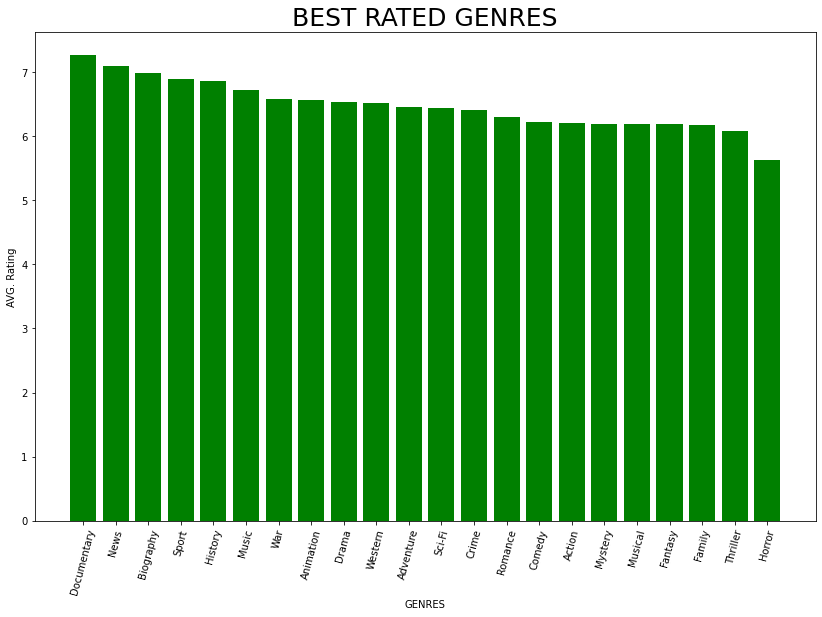

In [592]:
fig, ax = plt.subplots(figsize=(14, 9))

# Use plot() function to create a plot using above values
ax.bar(range(len(genres_rating)), genres_rating['averagerating'], color="green") 
ax.set_xticklabels(genres_rating['genres'], rotation=75)
ax.set_xticks(range(len(genres_rating)))
# Add labels for x and y axes
ax.set_xlabel('GENRES')
ax.set_ylabel('AVG. Rating')

# Add a title for the plot
ax.set_title('BEST RATED GENRES', fontdict={"fontsize":25})
# setting scale of the y axis

fig.savefig("brt.png")

### Profitability in Genres

> The below graph is showing which genres are the most profitable.

''

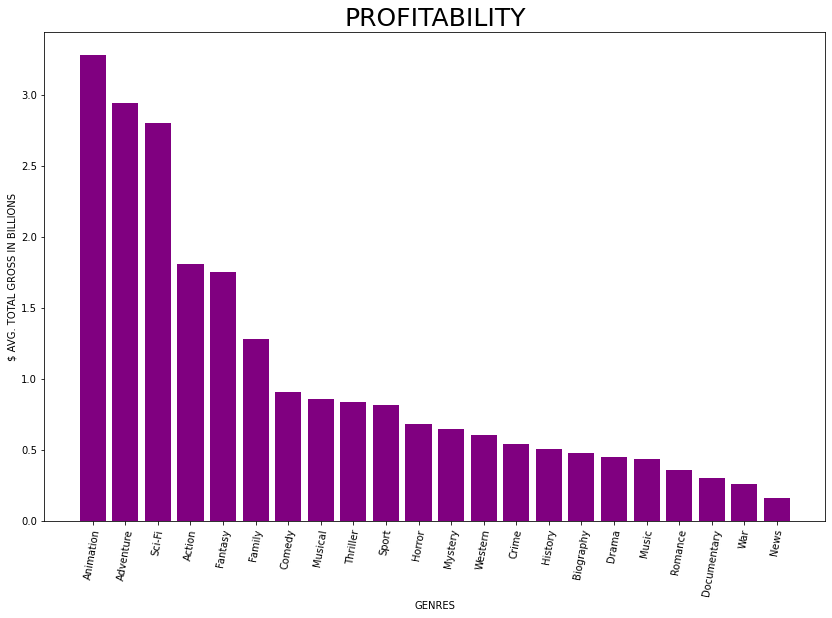

In [593]:
fig, ax = plt.subplots(figsize=(14, 9))

# Use plot() function to create a plot using above values
ax.bar(range(len(genres_total)), genres_total['total_gross']/1e8, color="purple")
ax.set_xticklabels(genres_total['genres'], rotation=80)
ax.set_xticks(range(len(genres_total)))
# Add labels for x and y axes
ax.set_xlabel('GENRES')
ax.set_ylabel('$ AVG. TOTAL GROSS IN BILLIONS')

# Add a title for the plot
ax.set_title('PROFITABILITY', fontdict={"fontsize":25})

fig.savefig("PROFITABILITY.png")
;

### Profitability by Year

> Scatter plots is allowing us to see the profitability of every movie across the years. In conclusion, more  movies are made in the less profitable region.

In [594]:
# Highest grossing movie 
df_merge[ df_merge["total_gross"] == df_merge["total_gross"].max()]

,title,domestic_gross,foreign_gross,start_year,genres,averagerating,numvotes,total_gross
1324,Avengers: Age of Ultron,459000000.0,946400000.0,2015,"Action,Adventure,Sci-Fi",7.3,665594,1.405400e+09


''

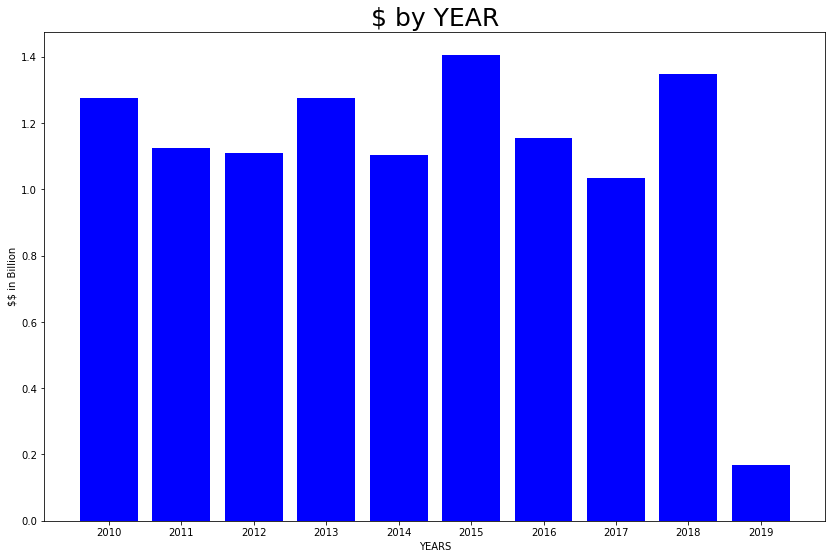

In [595]:
fig, ax = plt.subplots(figsize=(14, 9))


# Use plot() function to create a plot using above values
ax.bar(df_merge["start_year"], df_merge["total_gross"]/1e9, color="blue")

ax.set_xticks(range(2010, 2020))
# Add labels for x and y axes
ax.set_xlabel('YEARS')
ax.set_ylabel('\$$ in Billion')

# Add a title for the plot
ax.set_title('\$ by YEAR', fontdict={"fontsize":25})
fig.savefig("YEAR.png")
;

## Top Genres by Year
> What are the top genres profit on the yaer

# Conclusion 

> Determining the data gives us info about the ratings on the genres which aren't a criteria for the profit of the genres. While top profitibality genres are the Animation, Adventure and Sci-fi, the recomendation is to start a movie business on these genres.Further information is needed to emphasize the most total gross in the year (2018) as seasonal top pick to publish the movie for the higest profit expectation.